# Implementasi Proyek
11S4037 / Pemrosesan Bahasa Alami


In [77]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
import re 
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns 
plt.style.use('ggplot')

In [95]:
#LOAD DATASET
data_train = pd.read_csv('D:/Semester 7/NLP/PROYEK/DATASET/fnn_train.csv')

data_test = pd.read_csv('D:/Semester 7/NLP/PROYEK/DATASET/fnn_test.csv')



In [97]:
#Menampilkan beberapa data pertama pada data train
data_train.head()

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn
0,3106,2011-01-25T06:00:00-05:00,Joe Wilkinson,A national organization says Georgia has one o...,['http://www.ajc.com/news/georgia-politics-ele...,['A coalition of government watchdog groups la...,A coalition of government watchdog groups last...,fake
1,5655,2012-04-02T11:42:20-04:00,Rick Scott,"Says Barack Obama's health care law ""will be t...",['http://www.youtube.com/watch?v=TaC0mKApf9Q&f...,['As Supreme Court justices embarked on three ...,As Supreme Court justices embarked on three da...,fake
2,3506,2011-04-01T09:49:05-04:00,J.D. Alexander,Says the Southwest Florida Water Management Di...,['http://www.tampabay.com/news/politics/gubern...,"[""Here's a new one: The Senate budget committe...",Here's a new one: The Senate budget committee ...,fake
3,3450,2011-03-21T12:20:02-04:00,Paul Ryan,"""The Congressional Budget Office has this econ...",['http://www.cnn.com/2011/POLITICS/03/17/gop.b...,"['Recently, House Budget chairman Paul Ryan, R...","Recently, House Budget chairman Paul Ryan, R-W...",real
4,4776,2011-11-13T07:30:00-05:00,Rodney Frelinghuysen,"Says the Treasury Department ""says 41 percent ...",['http://frelinghuysen.house.gov/index.cfm?sec...,['The millionaires’ tax proposal made its late...,The millionaires’ tax proposal made its latest...,fake


In [98]:
#Menampilkan beberapa data pertama pada data test
data_test.head()

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn
0,1678,2010-04-11T16:37:40-04:00,Jon Kyl,"""President Obama himself attempted to filibust...",['http://abcnews.go.com/ThisWeek/video/supreme...,['U.S. Supreme Court Justice John Paul Stevens...,U.S. Supreme Court Justice John Paul Stevens a...,real
1,1820,2010-05-23T18:11:09-04:00,Michael Steele,"In Hawaii, ""they don't have a history of throw...",['http://www.starbulletin.com/news/bulletin/94...,"[""On ABC's This Week, the chairmen of the Repu...","On ABC's This Week, the chairmen of the Republ...",real
2,1624,2010-03-26T10:24:21-04:00,John Boehner,"""Our national debt ... is on track to exceed t...",['http://www.desmoinesregister.com/article/201...,['Ever since Barack Obama became president and...,Ever since Barack Obama became president and b...,real
3,1576,2010-03-12T11:45:14-05:00,America's Health Insurance Plans,"""Health insurance companies' costs are only 4 ...","['http://www.youtube.com/watch?v=4O8CxZ1OD58',...","[""As the battle over health care reform approa...",As the battle over health care reform approach...,real
4,1770,2010-05-07T11:54:44-04:00,Michael Bloomberg,"""We can prevent terror suspects from boarding ...",['http://www.huffingtonpost.com/michael-bloomb...,['In the wake of a foiled car bomb attempt in ...,In the wake of a foiled car bomb attempt in Ti...,real


In [99]:
#data transformation use encoding categorial Value
data_train.label_fnn.replace({"fake":0}, inplace= True)
data_train.label_fnn.replace({"real":1}, inplace= True)

data_test.label_fnn.replace({"fake":0}, inplace= True)
data_test.label_fnn.replace({"real":1}, inplace= True)

In [100]:
#Menampilkan beberapa data pertama pada data train yang labelnya sudah ditransformasi
data_train.head()

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn
0,3106,2011-01-25T06:00:00-05:00,Joe Wilkinson,A national organization says Georgia has one o...,['http://www.ajc.com/news/georgia-politics-ele...,['A coalition of government watchdog groups la...,A coalition of government watchdog groups last...,0
1,5655,2012-04-02T11:42:20-04:00,Rick Scott,"Says Barack Obama's health care law ""will be t...",['http://www.youtube.com/watch?v=TaC0mKApf9Q&f...,['As Supreme Court justices embarked on three ...,As Supreme Court justices embarked on three da...,0
2,3506,2011-04-01T09:49:05-04:00,J.D. Alexander,Says the Southwest Florida Water Management Di...,['http://www.tampabay.com/news/politics/gubern...,"[""Here's a new one: The Senate budget committe...",Here's a new one: The Senate budget committee ...,0
3,3450,2011-03-21T12:20:02-04:00,Paul Ryan,"""The Congressional Budget Office has this econ...",['http://www.cnn.com/2011/POLITICS/03/17/gop.b...,"['Recently, House Budget chairman Paul Ryan, R...","Recently, House Budget chairman Paul Ryan, R-W...",1
4,4776,2011-11-13T07:30:00-05:00,Rodney Frelinghuysen,"Says the Treasury Department ""says 41 percent ...",['http://frelinghuysen.house.gov/index.cfm?sec...,['The millionaires’ tax proposal made its late...,The millionaires’ tax proposal made its latest...,0


In [101]:
#Menampilkan beberapa data pertama pada data test yang labelnya sudah ditransformasi
data_test.head()

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn
0,1678,2010-04-11T16:37:40-04:00,Jon Kyl,"""President Obama himself attempted to filibust...",['http://abcnews.go.com/ThisWeek/video/supreme...,['U.S. Supreme Court Justice John Paul Stevens...,U.S. Supreme Court Justice John Paul Stevens a...,1
1,1820,2010-05-23T18:11:09-04:00,Michael Steele,"In Hawaii, ""they don't have a history of throw...",['http://www.starbulletin.com/news/bulletin/94...,"[""On ABC's This Week, the chairmen of the Repu...","On ABC's This Week, the chairmen of the Republ...",1
2,1624,2010-03-26T10:24:21-04:00,John Boehner,"""Our national debt ... is on track to exceed t...",['http://www.desmoinesregister.com/article/201...,['Ever since Barack Obama became president and...,Ever since Barack Obama became president and b...,1
3,1576,2010-03-12T11:45:14-05:00,America's Health Insurance Plans,"""Health insurance companies' costs are only 4 ...","['http://www.youtube.com/watch?v=4O8CxZ1OD58',...","[""As the battle over health care reform approa...",As the battle over health care reform approach...,1
4,1770,2010-05-07T11:54:44-04:00,Michael Bloomberg,"""We can prevent terror suspects from boarding ...",['http://www.huffingtonpost.com/michael-bloomb...,['In the wake of a foiled car bomb attempt in ...,In the wake of a foiled car bomb attempt in Ti...,1


C:\Users\Melani\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Fake News and Real News')

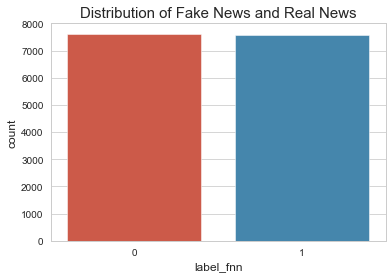

In [102]:
#visualisasi sebaran dataset fake dan true pada train dataset
label = data_train['label_fnn']
sns.set_style('whitegrid')
sns.countplot(label)
plt.title('Distribution of Fake News and Real News', size=15)

C:\Users\Melani\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Fake News and Real News')

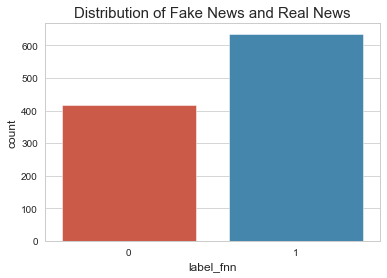

In [103]:
#visualisasi sebaran dataset fake dan true pada test dataset
label = data_test['label_fnn']
sns.set_style('whitegrid')
sns.countplot(label)
plt.title('Distribution of Fake News and Real News', size=15)

In [104]:
#dimensional reduction atau pengurangan dimensi pada data train
data_train = data_train.drop(['id','date','speaker','sources','paragraph_based_content','fullText_based_content'], axis = 1)

In [105]:
#dimensional reduction atau pengurangan dimensi pada data test
data_test = data_test.drop(['id','date','speaker','sources','paragraph_based_content','fullText_based_content'], axis = 1)

In [106]:
#Menampilkan beberapa data pertama pada data test yang labelnya sudah ditransformasi
data_train.head()

,statement,label_fnn
0,A national organization says Georgia has one o...,0
1,"Says Barack Obama's health care law ""will be t...",0
2,Says the Southwest Florida Water Management Di...,0
3,"""The Congressional Budget Office has this econ...",1
4,"Says the Treasury Department ""says 41 percent ...",0


In [107]:
#Menampilkan beberapa data pertama pada data test yang labelnya sudah ditransformasi
data_test.head()

,statement,label_fnn
0,"""President Obama himself attempted to filibust...",1
1,"In Hawaii, ""they don't have a history of throw...",1
2,"""Our national debt ... is on track to exceed t...",1
3,"""Health insurance companies' costs are only 4 ...",1
4,"""We can prevent terror suspects from boarding ...",1


In [108]:
# punctuation removal
data_train["statement"] = data_train['statement'].str.replace(r'[^\w\s]+', '')
data_test["statement"] = data_test['statement'].str.replace(r'[^\w\s]+', '')

In [109]:
#tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import WhitespaceTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Melani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [110]:
#Tokenisasi
data_train['statement']= data_train['statement'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize)
data_test['statement']= data_test['statement'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize)


In [111]:
data_train.head()

,statement,label_fnn
0,"[A, national, organization, says, Georgia, has...",0
1,"[Says, Barack, Obamas, health, care, law, will...",0
2,"[Says, the, Southwest, Florida, Water, Managem...",0
3,"[The, Congressional, Budget, Office, has, this...",1
4,"[Says, the, Treasury, Department, says, 41, pe...",0


In [112]:
data_test.head()

,statement,label_fnn
0,"[President, Obama, himself, attempted, to, fil...",1
1,"[In, Hawaii, they, dont, have, a, history, of,...",1
2,"[Our, national, debt, is, on, track, to, excee...",1
3,"[Health, insurance, companies, costs, are, onl...",1
4,"[We, can, prevent, terror, suspects, from, boa...",1


In [113]:
#stopword removal
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Melani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
#implementasi stopword removal
stop = stopwords.words('english')
data_train['statement'] = data_train['statement'].apply(lambda x: [item for item in x if item not in stop])
data_test['statement'] = data_test['statement'].apply(lambda x: [item for item in x if item not in stop])

In [115]:
#menampilkan data train setelah dilakukan stopword removal
data_train.head()

,statement,label_fnn
0,"[A, national, organization, says, Georgia, one...",0
1,"[Says, Barack, Obamas, health, care, law, bigg...",0
2,"[Says, Southwest, Florida, Water, Management, ...",0
3,"[The, Congressional, Budget, Office, economic,...",1
4,"[Says, Treasury, Department, says, 41, percent...",0


In [116]:
#menampilkan data test setelah dilakukan stopword removal
data_test.head()

,statement,label_fnn
0,"[President, Obama, attempted, filibuster, Just...",1
1,"[In, Hawaii, dont, history, throwing, incumben...",1
2,"[Our, national, debt, track, exceed, size, ent...",1
3,"[Health, insurance, companies, costs, 4, perce...",1
4,"[We, prevent, terror, suspects, boarding, airp...",1


In [117]:
#Lematisasi
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
def lema_words(text):
  wnl=WordNetLemmatizer()
  return[wnl.lemmatize(w) for w in text]



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Melani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [118]:
lemmatizer = WordNetLemmatizer()

data_train['statement'] = data_train['statement'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
data_test['statement'] = data_test['statement'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [119]:
#menampilkan data train setelah dilakukan lemmatisasi
data_train.head()

,statement,label_fnn
0,"[A, national, organization, say, Georgia, one,...",0
1,"[Says, Barack, Obamas, health, care, law, bigg...",0
2,"[Says, Southwest, Florida, Water, Management, ...",0
3,"[The, Congressional, Budget, Office, economic,...",1
4,"[Says, Treasury, Department, say, 41, percent,...",0


In [120]:
#menampilkan data test setelah dilakukan lemmatisasi
data_test.head()

,statement,label_fnn
0,"[President, Obama, attempted, filibuster, Just...",1
1,"[In, Hawaii, dont, history, throwing, incumben...",1
2,"[Our, national, debt, track, exceed, size, ent...",1
3,"[Health, insurance, company, cost, 4, percent,...",1
4,"[We, prevent, terror, suspect, boarding, airpl...",1


In [131]:
# skipgram - word2vec- CBOW
import numpy as np
from gensim.models import Word2Vec
w2v_model = Word2Vec(data_train['statement'], size=100, sg=1)

In [132]:
# mendefenisikan fungsi untuk membuat averaged sentence vector dari list of sentence tokens
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            # jumlahkan
            vec += w2v_model.wv.__getitem__(word).reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    # bagikan dengan total word dalam sentence
    if count != 0:
        vec /= count
    return vec

# konversi data_train['text'] dan data_test['text'] ke dalam list of vectors
X_train_w2v = np.concatenate([buildWordVector(z, 100) for z in map(lambda x: x, data_train['statement'])])


In [133]:
#vocab size
len(w2v_model.wv.vocab)

4550